# Previsão de resistência à compressão de concreto usando aprendizado de máquina

![image](https://www.dsigners.net/wp-content/uploads/2019/10/image1.jpg)

Determinar a resistência à compressão do concreto implica a determinar a qualidade do concreto, normalmente para se obter a medida dessa resistência é realizado um teste de laboratório em que um equipamento mede essa resistência.

>Os problemas nesses testes são normalmente:
>
>   * O tempo de espera para a cura do material coletado que é por volta de 28 dias;
>   * A probabilidade de erro humano durante o processo.
    
Uma forma de amenizar esses problemas é tentando atravéz de uma combinação de várias simulações digitais utilizando dados já obtidos de resistência tentar prever qual seria a resistência final em uma situação real para o menor tempo possivel utilizando algoritmos de aprendizado de máquina.

## Análise, limpeza e pré-processamento dos dados

In [1]:
# Importando biblioteca pandas para leitura dos dados
import pandas as pd
import numpy as np

#importando dataset
df = pd.read_csv('Concrete_Data.csv')

#imprimindo dataset
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Descrição dos dados utilizados:

Este dataset contém 1030 itens com 9 classes de atributos e como vamos verificar mas na frente não possui valores nulos ou faltantes (_nullvalues, missigin_values_), ele possui 8 atributos de entrada para a o algoritmo e 1 de saida que no caso é :

`Concrete compressive strenght(Mpa,megapascals)`. 

Sete dos valores são medidos em kg/m3 (Kilogramas por metro cúbico) o tempo de cura são representado em dias e a nossa variável target ou seja a variável que desejamos obter está em (MPa -- Mega Pascal).

### Rearranjo de nomes das colunas : Traduzindo o dataset

In [7]:
# Imprimindo o nome das colunas em inglês
df.columns


Index(['Cimento(kg/m3)', 'Brita(kg/m3)', 'Cinzas Volante(kg/m3)',
       'Agua(kg/m3)', 'Superplastificante(kg/m3)', 'Agregado Grosso(kg/m3)',
       'Agregado Fino(kg/m3)', 'Idade(dias)',
       'Resistencia a Compressao do Concreto(MPa)'],
      dtype='object')

In [46]:
#Alterando o nome das colunas:
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":"Cimento(kg/m3)",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"Brita(kg/m3)",
                   "Fly Ash (component 3)(kg in a m^3 mixture)":"Cinzas Volante(kg/m3)",
                   "Water  (component 4)(kg in a m^3 mixture)":"Agua(kg/m3)",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)":"Superplastificante(kg/m3)",
                   "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":"Agregado Grosso(kg/m3)",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)":"Agregado Fino(kg/m3)",
                   "Age (day)":"Idade(dias)",
                   "Concrete compressive strength(MPa, megapascals) ":"Resistencia a Compressao do Concreto(MPa)"},
         inplace=True)

Este passo apesar de simples é importante pois facilita muito na hora de trabalhar com os dados.

In [47]:
# Verificando dados nulos
missing = df.isnull().sum()
print(missing)


Cimento(kg/m3)               0
Brita(kg/m3)                 0
Cinzas Volante(kg/m3)        0
Agua(kg/m3)                  0
Superplastificante(kg/m3)    0
Agregado Grosso(kg/m3)       0
Agregado Fino(kg/m3)         0
Idade(dias)                  0
fck(Mpa)                     0
dtype: int64


Como dito anteriormente os dados não possuem nenhum item faltante.


In [48]:
# Verificando o dtype de casa coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cimento(kg/m3)             1030 non-null   float64
 1   Brita(kg/m3)               1030 non-null   float64
 2   Cinzas Volante(kg/m3)      1030 non-null   float64
 3   Agua(kg/m3)                1030 non-null   float64
 4   Superplastificante(kg/m3)  1030 non-null   float64
 5   Agregado Grosso(kg/m3)     1030 non-null   float64
 6   Agregado Fino(kg/m3)       1030 non-null   float64
 7   Idade(dias)                1030 non-null   int64  
 8   fck(Mpa)                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## Análise exploratória dos dados

O primeiro passo é analisar os dados no modo geral para obter insights antes mesmo de gerar qualquer modelo.

A primeira análise geral é a de correlação dos dados, essa análise nos ajuda a entender como os dados estão relacionados com cada feature(classes de variáveis).

Para entender melhor o coeficiente de correlação classifica as features entre si e retorna uma valor entre **-1 e 1**, e quanto mais proxima de zero menos relação há entre as duas variáveis.

![image2](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500)

In [318]:
#Abreviando o nome da classe
df.rename(columns={"Resistencia a Compressao do Concreto(MPa)":"fck(Mpa)"}, inplace=True)

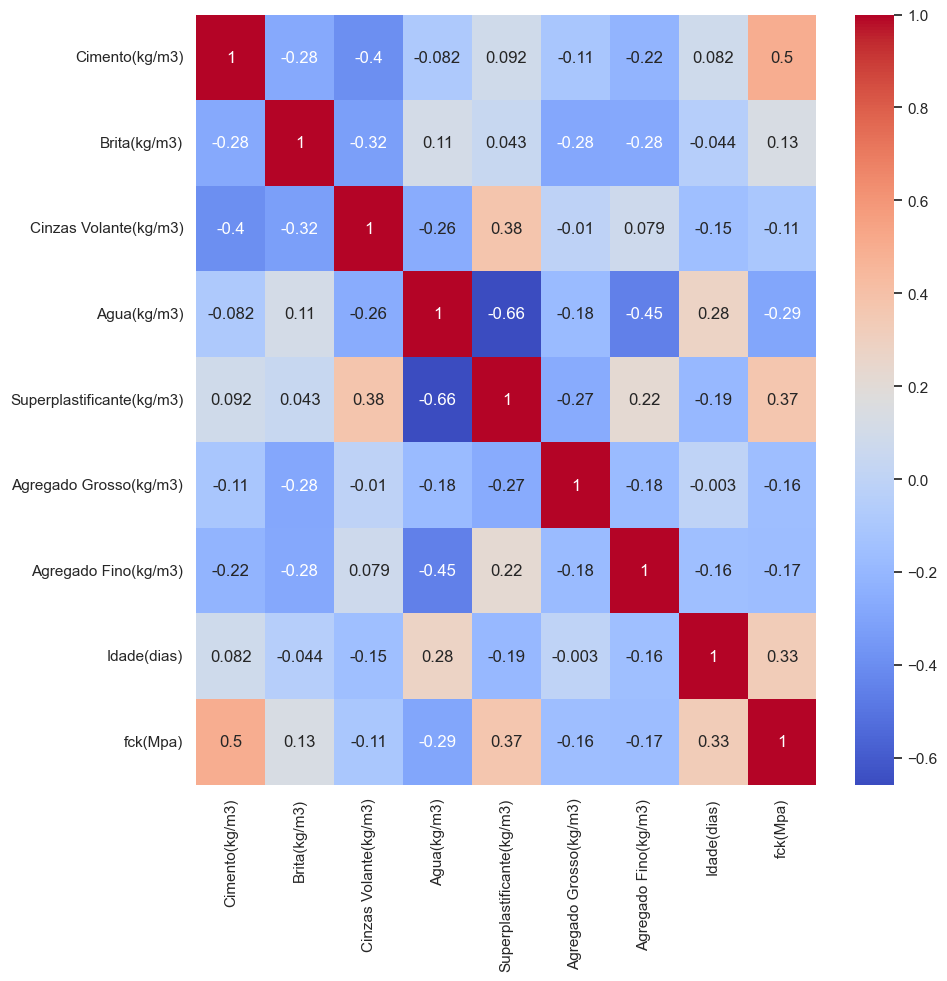

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Nesse gráfico podemos observar uma alta correlação positiva entre concreto e a resistencia a compressão do concreto, oque de fato está correto, a resistencia realmente aumenta com o aumento de cimento.

> Se verificarmos na literatura o traço do concreto é fortemente influenciado pela combinação de cimento, areia brita e água.

O superplastificante também possui uma correlação positiva forte justamente por sua utilização ser para dar uma resistência maior,  diminuindo a quantidade de água no concreto.

>"Os aditivos superplastificantes são utilizados na mistura com o concreto para diminuir a quantidade de água, aumentando a sua resistência e fluidez.
>
>Quanto maior a quantidade de água aplicada ao concreto, menos resistente ele terá, o que poderá ocasionar fissuras que aparecerão durante o endurecimento da estrutura".
                                 

Oque justifica a correlação negativa forte da água em relação a resistencia a compressão do concreto.

## Representação visual de cada correlação.

In [326]:

Isg_df = df[["fck(Mpa)","Idade(dias)"]]

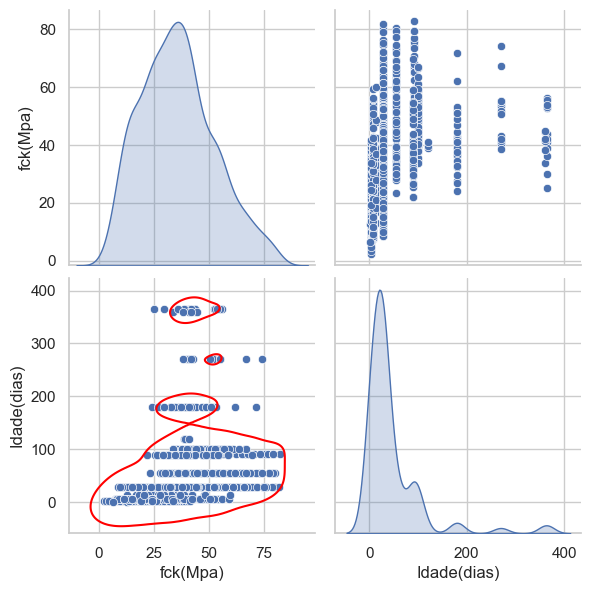

In [327]:
sns.set_theme(style="whitegrid")
corr_1 = sns.pairplot(Isg_df, height=3.0, diag_kind="kde")
corr_1.map_lower(sns.kdeplot, color="red", levels=2)

## Verificando Outliers


### Oque são os Outliers?

Em poucas palavras outliers são os pontos que se distanciam muito dentro dos conjunto de valores.

Esses outliers podem acabar causando um desequilibrio nos resultados obtidos.


In [328]:
# Verificando para cada uma das colunas
nome_colunas = ["Cimento(kg/m3)","Brita(kg/m3)","Cinzas Volante(kg/m3)",
                "Agua(kg/m3)","Superplastificante(kg/m3)",
                "Agregado Grosso(kg/m3)","Agregado Fino(kg/m3)",
                "Idade(dias)","Resistencia a Compressao do Concreto(MPa)"]

def boxplot_plot(dataset_name, nome_colunas):
    df = dataset_name
    for colunas in nome_colunas:
        df.boxplot(column=colunas)
        plt.show()


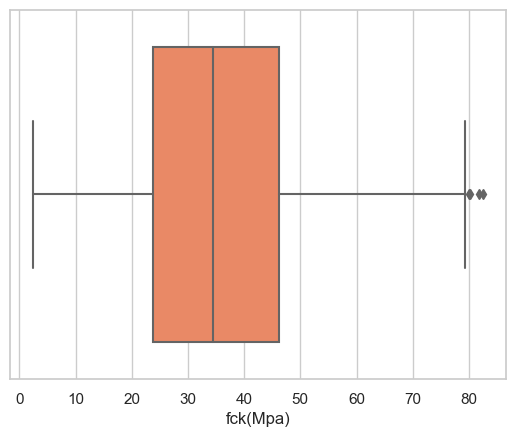

In [329]:
ax = sns.boxplot(x=df["fck(Mpa)"], color="coral")


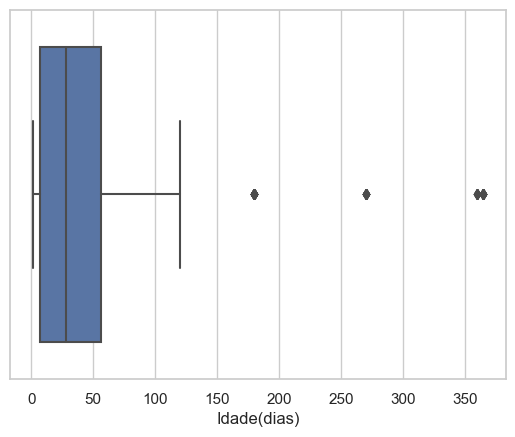

In [330]:
ax1 = sns.boxplot (x=df["Idade(dias)"], palette="deep")

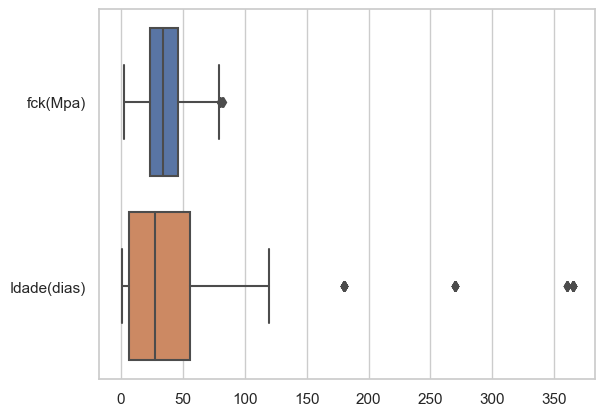

In [331]:
ax2 = sns.boxplot(data=Isg_df, orient="h")

O concreto, a partir de estudos, atinge a resistência máxima aos 28 dias logo para eliminar esses outliers vamos remover os dados que contenham resistencias com mais de 30 dias.


> REFERÊNCIA BIBLIOGRÁFICA: YAZIGI, Walid. A Técnica de Edificar – Editora Pini - 14ª Ed - Páginas 263 e 264.

In [332]:
## IMPORTA: Verificar se esse algoritmo ta realmente coletando a média
## entre os intervalos solicitados.

seq_val = np.arange(10,350,20)

t_idade = []
results = []
qnt = []
for values in seq_val:
    new_df = df.loc[df["Idade(dias)"] <= values]
    results.append(new_df["fck(Mpa)"].mean())
    qnt.append(len(df["Idade(dias)"]))
    t_idade.append(values)

for value, result in zip(seq_val, results):
    print(f'Idade: {value} dias  -->  fck Médio: {result:.2f} MPa ')

Idade: 10 dias  -->  fck Médio: 22.31 MPa 
Idade: 30 dias  -->  fck Médio: 31.04 MPa 
Idade: 50 dias  -->  fck Médio: 31.04 MPa 
Idade: 70 dias  -->  fck Médio: 33.29 MPa 
Idade: 90 dias  -->  fck Médio: 33.73 MPa 
Idade: 110 dias  -->  fck Médio: 35.30 MPa 
Idade: 130 dias  -->  fck Médio: 35.31 MPa 
Idade: 150 dias  -->  fck Médio: 35.31 MPa 
Idade: 170 dias  -->  fck Médio: 35.31 MPa 
Idade: 190 dias  -->  fck Médio: 35.48 MPa 
Idade: 210 dias  -->  fck Médio: 35.48 MPa 
Idade: 230 dias  -->  fck Médio: 35.48 MPa 
Idade: 250 dias  -->  fck Médio: 35.48 MPa 
Idade: 270 dias  -->  fck Médio: 35.68 MPa 
Idade: 290 dias  -->  fck Médio: 35.68 MPa 
Idade: 310 dias  -->  fck Médio: 35.68 MPa 
Idade: 330 dias  -->  fck Médio: 35.68 MPa 


In [333]:

mini_df = pd.DataFrame({'dias':t_idade,
                      'fck Médio':results,
                      })

def highlight_median(median):
    if median == mini_df['fck Médio'].median():
        return 'background-color:green'
    else:
        return ''
    
mini_df.style.applymap(highlight_median, subset=['fck Médio'])

,dias,fck Médio
0,10,22.308397
1,30,31.035407
2,50,31.035407
3,70,33.294679
4,90,33.728714
5,110,35.297562
6,130,35.310999
7,150,35.310999
8,170,35.310999
9,190,35.478405


In [355]:

dias = [1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
qnt = [2, 134, 126, 62, 425, 91, 54, 22, 52, 3, 26, 13, 6, 14]

meta_v = pd.DataFrame({"Idade(dias)":dias,
                     'Qnt.(itens)':qnt})
meta_v

,Idade(dias),Qnt.(itens)
0,1,2
1,3,134
2,7,126
3,14,62
4,28,425
5,56,91
6,90,54
7,91,22
8,100,52
9,120,3


<Axes: xlabel='Idade(dias)', ylabel='Qnt.(itens)'>

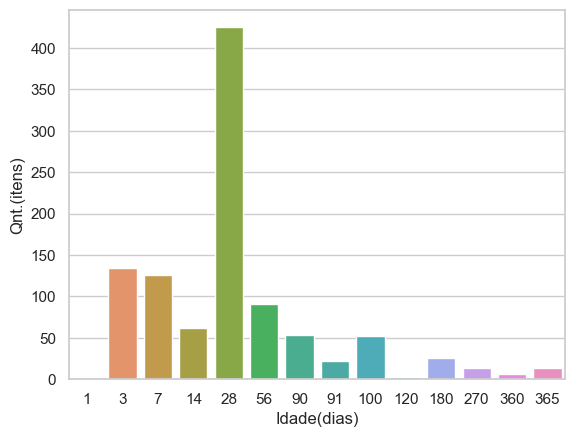

In [335]:

sns.barplot(data=meta_v, x=meta_v["Idade(dias)"], y=meta_v["Qnt.(itens)"])

# Novo dataset com a delimitação de até 80 dias
new_df = df.loc[df["Idade(dias)"] <= 10]

ax = sns.boxplot(x=new_df["Idade(dias)"])
new_df.shape


(840, 9)

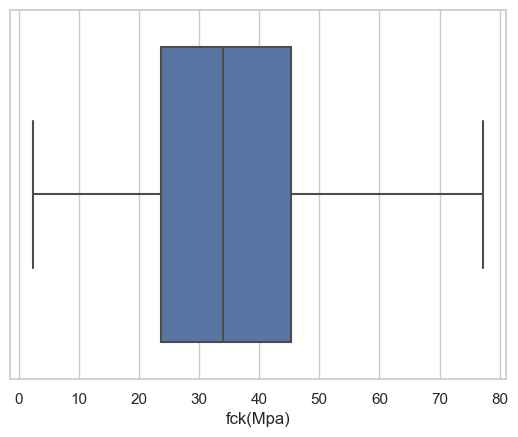

In [386]:
parameter = 78
new_df = df.loc[df["Idade(dias)"] <= parameter]
new_df1 = df.loc[df["fck(Mpa)"] <= parameter]


ax1 = sns.boxplot(x=new_df1["fck(Mpa)"])
new_df.shape

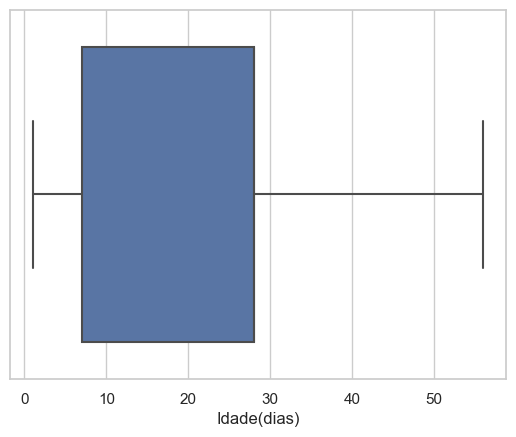

In [387]:
ax = sns.boxplot(x=new_df["Idade(dias)"])

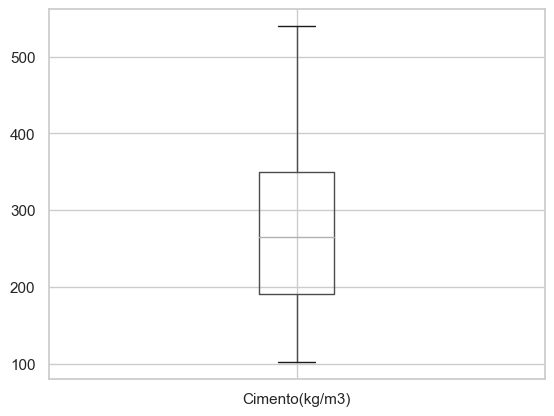

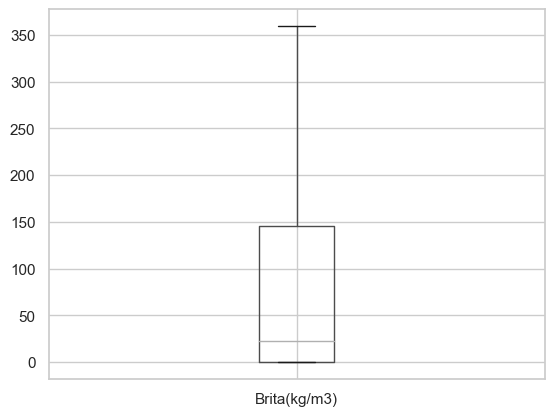

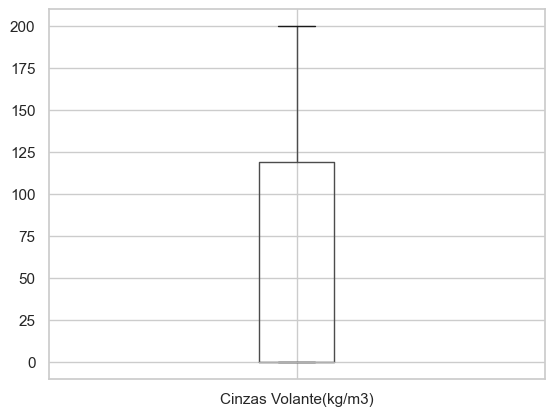

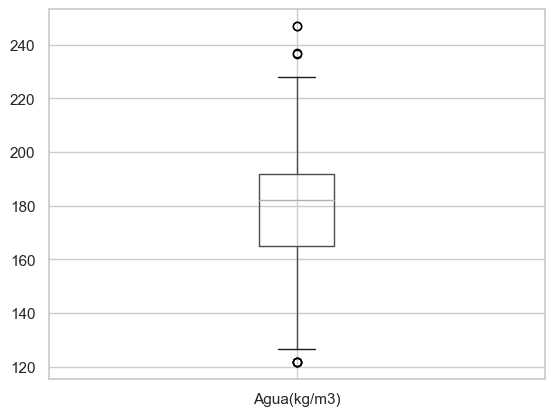

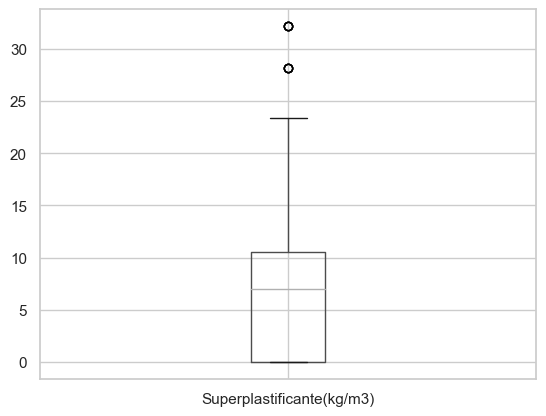

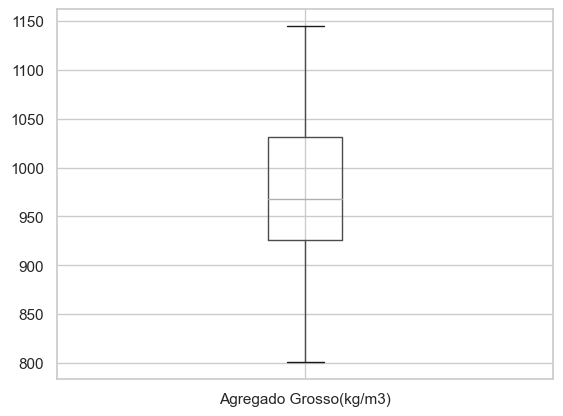

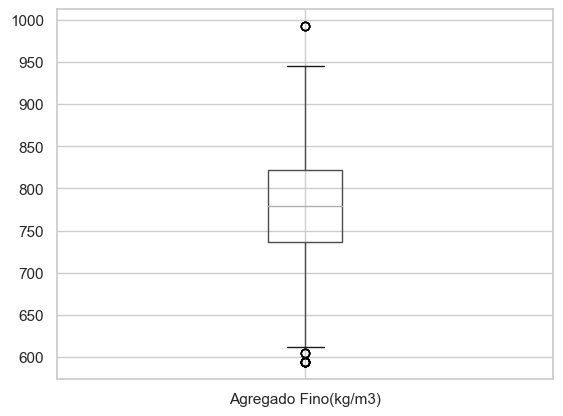

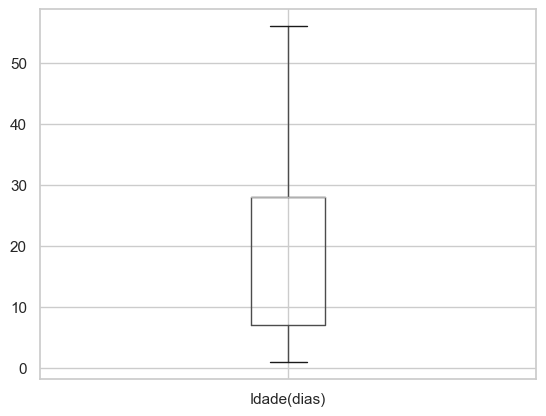

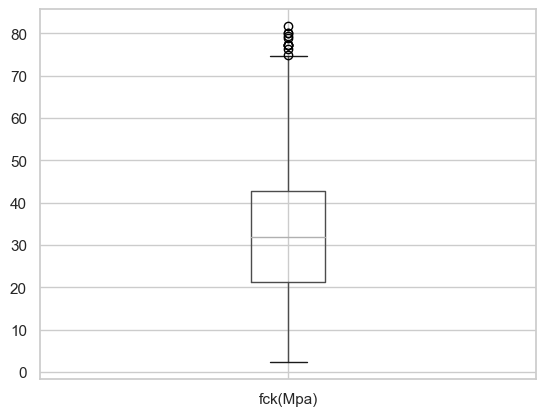

In [388]:
# Verificano outliers com a nova delimitação de dados:
nome_colunas = ["Cimento(kg/m3)","Brita(kg/m3)","Cinzas Volante(kg/m3)",
                "Agua(kg/m3)","Superplastificante(kg/m3)",
                "Agregado Grosso(kg/m3)","Agregado Fino(kg/m3)",
                "Idade(dias)","fck(Mpa)"]
boxplot_plot(new_df, nome_colunas)

(840, 9)

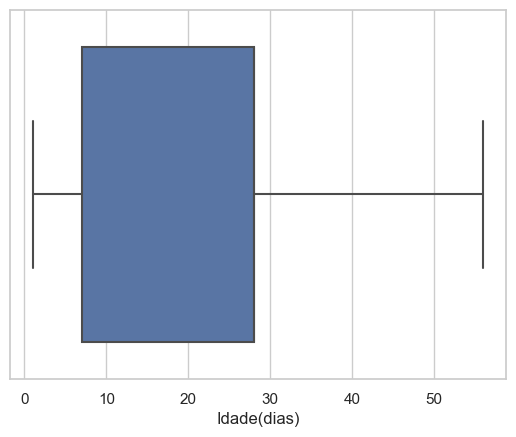

In [389]:
new_df = df.loc[df["Idade(dias)"] <= 70]

ax = sns.boxplot(x=new_df["Idade(dias)"])
new_df.shape

# Encontrando o melhor modelo

Modelos Utilizados:

* Regressão Linear;
* Regressão Ridge;
* Regressão Lasso;
* Regressão Elastic Net;
* Arvore de Decisão.

In [390]:
df1 = new_df
df1.head()

,Cimento(kg/m3),Brita(kg/m3),Cinzas Volante(kg/m3),Agua(kg/m3),Superplastificante(kg/m3),Agregado Grosso(kg/m3),Agregado Fino(kg/m3),Idade(dias),fck(Mpa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [391]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cimento(kg/m3)             840 non-null    float64
 1   Brita(kg/m3)               840 non-null    float64
 2   Cinzas Volante(kg/m3)      840 non-null    float64
 3   Agua(kg/m3)                840 non-null    float64
 4   Superplastificante(kg/m3)  840 non-null    float64
 5   Agregado Grosso(kg/m3)     840 non-null    float64
 6   Agregado Fino(kg/m3)       840 non-null    float64
 7   Idade(dias)                840 non-null    int64  
 8   fck(Mpa)                   840 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 65.6 KB


In [392]:
# Dividindo as variáveis em treino e variavel target:

y = df1['fck(Mpa)']
x = df1.drop('fck(Mpa)', axis=1)

In [393]:
# Regressão Linear

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score, mean_squared_error

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

# Instanciando valores de predições realizadas nos dados de teste:
#y_train_pred = modelo.predict(x_treino) 

y_test_pred_reg = modelo.predict(x_teste) 

r2_linear = r2_score(y_teste, y_test_pred_reg)
rmse_linear = np.sqrt(mean_squared_error(y_teste, y_test_pred_reg))

print(f'Coef R2 (Linear): {r2_linear}')
print(f'RMSE (linear): {rmse_linear}')



       

Coef R2 (Linear): 0.802532468413681
RMSE (linear): 7.161701547957985


caso deseje verificar os valores para os dados de treino utilize:

`y_test_pred = modelo.predict(x_treino)`.

Essa situação é interessante pois assim é possivel verificar se não houve um overfitting aos dados de treino.

In [394]:
# Regressão Ridge

from sklearn.linear_model    import Ridge
from sklearn.model_selection import GridSearchCV

# Definindo os valores de alpha a serem avaliados
variation = np.arange(1, 370)
param={'alpha':variation}

# Instanciando a função do modelo a ser utilizado
ModeloRidge = Ridge()
grid = GridSearchCV(ModeloRidge, param_grid=param, cv=5, scoring="r2")

# Dandos fit aos dados para encontrar o melhor valor de alpha
ModeloRidge.fit(x_treino, y_treino)

# Obtendo o melhor valor de alpha
hyp_rid = grid.fit(x_treino, y_treino)
hyp_rid.best_params_

# Inserindo o valor obtido de alpha e dando fit aos dados
rid = Ridge(alpha=hyp_rid.best_params_['alpha'])
rid.fit(x_treino, y_treino)

# Obtendo os resultados
y_test_pred = rid.predict(x_teste) 
r2_ridge = r2_score(y_teste, y_test_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_teste, y_test_pred))

# Imprimindo os resultados
print(f'Coef R2 (RIDGE): {r2_ridge}')
print(f'RMSE (RIDGE): {rmse_ridge}')


Coef R2 (RIDGE): 0.8024412395839362
RMSE (RIDGE): 7.163355688772935


In [395]:
# Regressão Lasso

from sklearn.linear_model import Lasso 

# Dando fit aos dados de treino e teste
lasso = Lasso(alpha=1000, tol=0.1, max_iter=1000 )
lasso.fit(x_treino, y_treino)

# Obtendo os resultados:
y_teste_pred = lasso.predict(x_teste)
r2_lasso = r2_score(y_teste, y_teste_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_teste, y_teste_pred))

print(f'Coef R2 (LASSO): {r2_lasso}')
print(f'RMSE (LASSO): {rmse_lasso}')




Coef R2 (LASSO): -0.004184865556444484
RMSE (LASSO): 16.15009962492293


In [396]:
# Elastic Net
from sklearn.linear_model import ElasticNet

# Instanciando a função para a varialvel 'elastic':
elastic = ElasticNet(alpha=1, l1_ratio=0.7)
elastic.fit(x_treino, y_treino)

#Obtendo os resultados
y_teste_pred = elastic.predict(x_teste)
r2_elastic = r2_score(y_teste, y_teste_pred) 
rmse_elastic = np.sqrt(mean_squared_error(y_teste, y_teste_pred)) 

print(f'Coef R2 (ELASTICNET): {r2_elastic}')
print(f'RMSE (ELASTICNET): {rmse_elastic}')




Coef R2 (ELASTICNET): 0.8022296722134468
RMSE (ELASTICNET): 7.167190311929453


In [397]:
# Regressão Logistica
"""
from sklearn.linear_model import LogisticRegression

# Definindo Parametros:
valores_C = np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
penalty = ['l2']
valores_grid = {'C':valores_C, 'penalty':penalty}

# Criando o modelo:
modelo = LogisticRegression()

# Criando os Grids:
RLgrid = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5)
RLgrid.fit(x_treino, y_treino)

print(RLgrid.best_params_)
"""
print("ValueError: Unknown label type: 'continuous'")




ValueError: Unknown label type: 'continuous'


_"The algorith Does not Work, he expect an categorical value and i'm passing an float value"_


O algoritmo não funciona para esse conjunto de dados.

Ele espear um valor target que seja categorico e estou passando valores flutuantes, o mesmo acontece para algoritmos de classificação como KNN.

Solução parao problema pode ser encontrada no [stack overflow](https://stackoverflow.com/questions/46051985/tuning-elasticnet-parameters-sklearn-package-in-python).

In [398]:
# Eliminando avisos do algoritmo:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Definindo os valores de grid:
min_split = np.arange(1,50)
max_nivel = np.arange(1,100)
algoritmo = ["friedman_mse", "mae", "poisson"]
val_grid = {'min_samples_split':min_split, 'max_depth':max_nivel,
            'criterion':algoritmo}


#Creating the model:
treeReg = DecisionTreeRegressor()

#Creating the grids:
gdt = GridSearchCV(treeReg, param_grid=val_grid, cv=5)
gdt.fit(x_treino, y_treino)

#Instanciando os melhores valores obtidos para serem inseridos na funçao:
crit = gdt.best_params_['criterion']
depth = gdt.best_params_['max_depth']
splits = gdt.best_params_['min_samples_split']


# Instanciando novamente com o melhor modelo encontrado:
hyp_treeReg = DecisionTreeRegressor(criterion=crit, max_depth=depth,
                                     min_samples_split=splits)
hyp_treeReg.fit(x_treino, y_treino)


#Obtendo os resultados
y_teste_pred = hyp_treeReg.predict(x_teste)
r2_tree = r2_score(y_teste, y_teste_pred) 
rmse_tree = np.sqrt(mean_squared_error(y_teste, y_teste_pred)) 

print(f'Coef R2 (Decision Tree Regressor): {r2_tree}')
print(f'RMSE (Decision Tree Regressor): {rmse_tree}')


Coef R2 (Decision Tree Regressor): 0.8454248770955377
RMSE (Decision Tree Regressor): 6.33633558226765


In [399]:
models_results = {'Modelos':['Regressão Linear','Regressão Ridge','Regressão Lasso','Regressão Elastic Net','Regressão com Arvore de Decisão'],
                'R²':[r2_linear, r2_ridge, r2_lasso, r2_elastic, r2_tree],
                'RMSE':[rmse_linear, rmse_ridge, rmse_lasso, rmse_elastic, rmse_tree]}

df_results = pd.DataFrame(models_results)

df_results

,Modelos,R²,RMSE
0,Regressão Linear,0.802532,7.161702
1,Regressão Ridge,0.802441,7.163356
2,Regressão Lasso,-0.004185,16.150100
3,Regressão Elastic Net,0.802230,7.167190
4,Regressão com Arvore de Decisão,0.845425,6.336336


## Resultado:

O algoritmo de **Regressão Linear** obteve o maior valor de Coeficiente de determinação r2 assim como o menor de desvio quadrático.

In [385]:
# Visualizando as previsções para o conjunto de valores teste:

print(y_test_pred_reg)

[26.1726435  23.42424258 27.76462865 44.77705869 42.93117597 58.29708454
 39.4917629  42.87272442 29.88507445 22.2846156  45.56525637  5.85004851
 47.29715154 57.34091495 36.94679824 35.66990262 25.00311968 31.85574916
 12.63409149 14.28704463 22.02380331 39.53519578 18.96236561 34.81766152
 32.4227453  32.78542283 40.38710656 52.44939522 23.38339834 44.20991889
 21.77084407 38.56245246 23.89541501 32.57626023 29.9533666  21.1866297
 18.3667059  11.63791276 37.0154214  40.46031772 21.92131221 32.65128572
 19.6089155  24.8402648  27.00953333 43.14327764 21.9266016  27.43607042
 35.55997726 30.7654743  25.30573339 24.66760023 26.08546968 18.36725486
 46.8404085  54.77452523 35.8669001  24.20144687 18.15552953 43.64857579
 42.82540626 24.12254408 24.91601249 27.75467498 26.76775425 27.76181473
 38.37950795 24.77632928 16.97094065 18.8572787  28.64978646 25.99512759
 38.13964087 25.44208168 35.7879309  21.96057517 30.2176708  27.74740981
 32.36958369 43.33451886 35.11248135 27.04604621 35.